In [1]:
import math
import numpy as np
import pandas as pd
from skimage import io, transform, segmentation, color
from skimage.future import graph
from skimage.color import rgba2rgb

In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.chdir('C:/Users/bunny/Desktop/images-227/')
feature_data= pd.DataFrame(columns=['Website','Year','Month'])


(227, 227, 4)


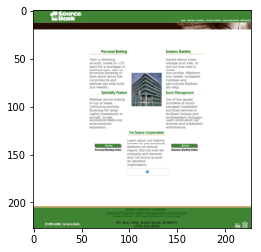

In [4]:
img = io.imread('C:/Users/bunny/Desktop/images-227/1stsource.com/20030406124422.png')
(h, w) = img.shape[:2]
channel = img.shape[2]
print((h,w,channel))
plt.imshow(img)


In [5]:
def get_png_compress_ratio(image, image_size):
    (h, w) = image.shape[:2]
    channel = image.shape[2]
    color_byte = 1
    uncompressed_size = h * w * channel * color_byte
    return 1.0 * image_size / uncompressed_size


In [6]:
import numpy as np
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
import warnings

def get_entropy(image):
    entr_img = entropy(color.rgb2gray(image), disk(10))
    # print(entr_img.shape)
    return entr_img.mean()


C:\Users\bunny\AppData\Local\Programs\Python\Python36\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


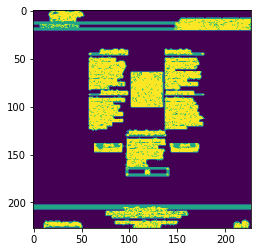

In [7]:
gray_img = color.rgb2gray(img)
entropy_img = entropy(gray_img, disk(1))
plt.imshow(entropy_img)

C:\Users\bunny\AppData\Local\Programs\Python\Python36\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


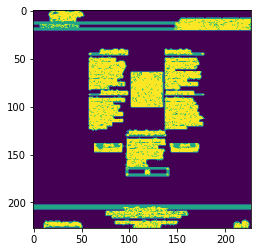

In [8]:
import pyqtree_test

def get_quadtree_leaves_count(image_path, minDev=10, minSz=10.0):
    return pyqtree_test.get_node_count(image_path, minDev, minSz)


C:\Users\bunny\AppData\Local\Programs\Python\Python36\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


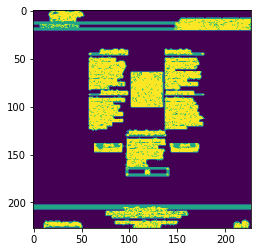

In [9]:
%%time
year_final = []
month_final = []
website_final = []
feature_final = []

count_img = 0

for website in os.listdir(os.getcwd()):
    web_dir = os.path.join(os.getcwd(), website)    
    if not os.path.isdir(web_dir):
        continue
    for img in os.listdir(web_dir):
        img_path = os.path.join(os.getcwd(), website, img)
        img_path = img_path.replace('\\', '//')  # for Windows adjustment 
        if (os.path.exists(img_path) == -1):
            print("[ERROR] Error while reading")
        year = img[:4]
        month = img[4:6]
        image = io.imread(img_path)
        file_info = os.stat(img_path)
        file_size = file_info.st_size
        
        compress_ratio = get_png_compress_ratio(image, image_size=file_size)
        
        # remove the alpha channel
        if image.shape[2] == 4:
            image = image[:, :, :3]
        
        # with warnings.catch_warnings():
        #     warnings.simplefilter("ignore")
        #     image_entropy = get_entropy(image)
        image_entropy = 0
        
        quadtree_leaves = get_quadtree_leaves_count(img_path)

        entropy_index = 10.0
        quadtree_index = 1000.0
        image_entropy /= entropy_index
        quadtree_leaves /= quadtree_index
        average_complexity = (compress_ratio + image_entropy + quadtree_leaves)/3
        
        feature = [compress_ratio,
                   image_entropy,
                   quadtree_leaves,
                   average_complexity]
        


        year_final.append(year)
        month_final.append(month)
        website_final.append(website)
        feature_final.append(feature)
        count_img += 1
        if count_img % 1000 == 0:
            print(count_img)


In [10]:
dataSet = pd.DataFrame(feature_final,columns=['png_compress_complexity', 'entropy', 'QuadTree_leaves', 'comprehensive'])
dataSet['Year'] = year_final
dataSet['Month'] = month_final
dataSet['Website'] = website_final


In [11]:
dataSet.shape

(15373, 7)

In [12]:
dataSet.head()

,png_compress_complexity,entropy,QuadTree_leaves,comprehensive,Year,Month,Website
0,0.086990,0.0,0.387,0.157997,2003,02,1stsource.com
1,0.089794,0.0,0.391,0.160265,2003,02,1stsource.com
2,0.089784,0.0,0.394,0.161261,2003,02,1stsource.com
3,0.088377,0.0,0.389,0.159126,2003,03,1stsource.com
4,0.127928,0.0,0.486,0.204643,2003,04,1stsource.com


In [13]:
dataSet.to_csv('complexityFeature.csv',index=False)